In [99]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import OrdinalEncoder

In [100]:
# Nuskaitome duomenis, tuščius laukelius užpildome "0"
df = pd.read_csv('adds.csv')
df.fillna('0', inplace=True)
df.head()

,company,old,title,link,salary,netgross,city
0,UAB „Nordcode technology“,prieš 1 d.,BUSINESS ANALYST (WEB SYSTEMS),https://www.cvbankas.lt/business-analyst-web-s...,3000-4500,Neatskaičius mokesčių,Vilniuje
1,UAB „WAAVO“,prieš 5 d.,Senior PHP programuotojas,https://www.cvbankas.lt/senior-php-programuoto...,2000-5000,Į rankas,Vilniuje
2,FREDA LEZ,prieš 6 d.,IT projektų vadovas (-ė) (LEZ),https://www.cvbankas.lt/it-projektu-vadovas-e-...,2500-3500,Neatskaičius mokesčių,Kaune
3,UAB „Furniture1“,prieš 8 d.,Junior - Mid FULL STACK developer,https://www.cvbankas.lt/junior-mid-full-stack-...,1300-2000,Į rankas,Vilniuje
4,UAB „Softemia LT“,prieš 14 d.,MAINTENANCE ENGINEER,https://www.cvbankas.lt/maintenance-engineer-v...,1500-2200,Į rankas,Vilniuje


In [101]:
# Funkcijos min ir max atlyginimo ištraukimui
# minsalary
pattern = re.compile(r'\d+')
def lower_val(s):
    lower = pattern.search(s)
    return int(lower.group())

# maxsalary
pattern2 = re.compile(r'\d+$')
def upper_val(s):
    upper = pattern2.search(s)
    return int(upper.group())

In [102]:
# Ištraukiame min ir max atlyginimo reikšmes iš 'salary' laukelio
# "skaitmenizuojame" brutto/netto
df['minsalary'] = df['salary'].apply(lower_val)
df['maxsalary'] = df['salary'].apply(upper_val)
df['ngcat'] = df['netgross'].replace('Į rankas',int(2))
df.ngcat[df.netgross == 'Neatskaičius mokesčių'] = int(1)

/tmp/ipykernel_23849/3360965149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ngcat[df.netgross == 'Neatskaičius mokesčių'] = int(1)


In [103]:
# Privedame visą atlygį prie NETTO
df.loc[df.ngcat==1, "mins"] = df.minsalary*0.6
df.loc[df.ngcat==1, "maxs"] = df.maxsalary*0.6
df.loc[df.ngcat==2, "mins"] = df.minsalary
df.loc[df.ngcat==2, "maxs"] = df.maxsalary
df.loc[df.ngcat==0, "mins"] = df.minsalary
df.loc[df.ngcat==0, "maxs"] = df.maxsalary
df.head()

,company,old,title,link,salary,netgross,city,minsalary,maxsalary,ngcat,mins,maxs
0,UAB „Nordcode technology“,prieš 1 d.,BUSINESS ANALYST (WEB SYSTEMS),https://www.cvbankas.lt/business-analyst-web-s...,3000-4500,Neatskaičius mokesčių,Vilniuje,3000,4500,1,1800.0,2700.0
1,UAB „WAAVO“,prieš 5 d.,Senior PHP programuotojas,https://www.cvbankas.lt/senior-php-programuoto...,2000-5000,Į rankas,Vilniuje,2000,5000,2,2000.0,5000.0
2,FREDA LEZ,prieš 6 d.,IT projektų vadovas (-ė) (LEZ),https://www.cvbankas.lt/it-projektu-vadovas-e-...,2500-3500,Neatskaičius mokesčių,Kaune,2500,3500,1,1500.0,2100.0
3,UAB „Furniture1“,prieš 8 d.,Junior - Mid FULL STACK developer,https://www.cvbankas.lt/junior-mid-full-stack-...,1300-2000,Į rankas,Vilniuje,1300,2000,2,1300.0,2000.0
4,UAB „Softemia LT“,prieš 14 d.,MAINTENANCE ENGINEER,https://www.cvbankas.lt/maintenance-engineer-v...,1500-2200,Į rankas,Vilniuje,1500,2200,2,1500.0,2200.0


In [88]:
# df.city = df.city.astype('category')

In [104]:
df.dtypes

company       object
old           object
title         object
link          object
salary        object
netgross      object
city          object
minsalary      int64
maxsalary      int64
ngcat         object
mins         float64
maxs         float64
dtype: object

In [105]:
# bins reikšmė grafikams
bins=100

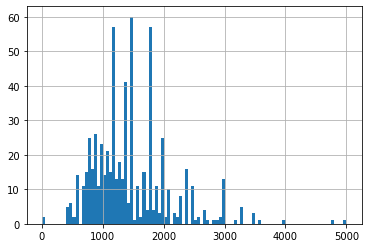

In [106]:
minhist = df.mins.hist(bins=bins)

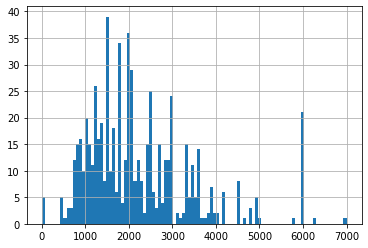

In [107]:
maxhist = df.maxs.hist(bins=bins)

In [110]:
# reikšmių distribucija
df.groupby('maxs').count()

,company,old,title,link,salary,netgross,city,minsalary,maxsalary,ngcat,mins
maxs,,,,,,,,,,,
9.0,2,2,2,2,2,2,2,2,2,2,2
12.0,1,1,1,1,1,1,1,1,1,1,1
15.0,1,1,1,1,1,1,1,1,1,1,1
24.0,1,1,1,1,1,1,1,1,1,1,1
438.0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5000.0,1,1,1,1,1,1,1,1,1,1,1
5750.0,1,1,1,1,1,1,1,1,1,1,1
6000.0,21,21,21,21,21,21,21,21,21,21,21


In [111]:
# Išvalome duomenis su valandiniu atlygiu (mins arba maxs < 438)
df = df[df.maxs > 437]

In [115]:
# Statistika
print(df.describe())

         minsalary     maxsalary        mins         maxs
count   632.000000    632.000000   632.00000   632.000000
mean   2287.363924   3487.677215  1474.11962  2233.832911
std    1036.618898   2030.570439   639.22933  1219.776267
min     500.000000    600.000000   438.00000   438.000000
25%    1500.000000   2000.000000  1020.00000  1364.750000
50%    2100.000000   3000.000000  1380.00000  1983.600000
75%    3000.000000   4500.000000  1800.00000  2820.000000
max    8000.000000  10000.000000  5000.00000  7000.000000


city
Darbas namuose    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Elektrėnuose      [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Kaišiadoryse      [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Kaune             [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Klaipėdoje        [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Latvijoje         [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Mažeikiuose       [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Panevėžyje        [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Plungėje          [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Telšiuose         [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Utenoje           [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Vilniuje          [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Vokietijoje       [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
Šiauliuose        [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

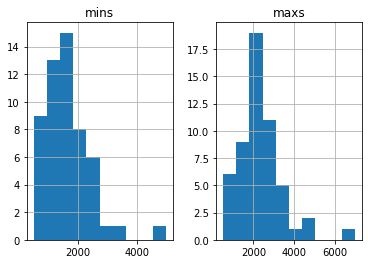

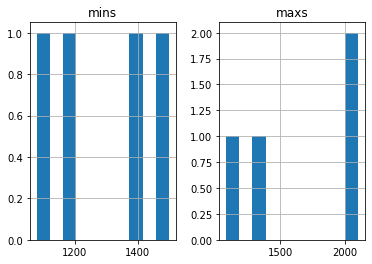

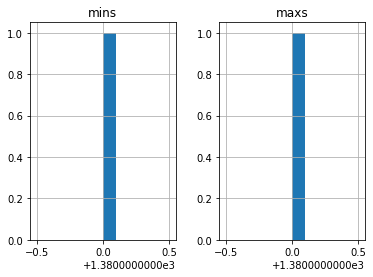

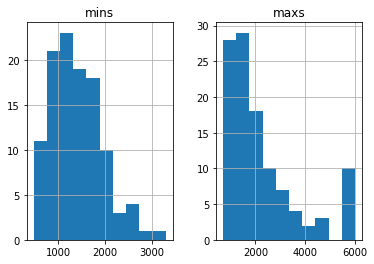

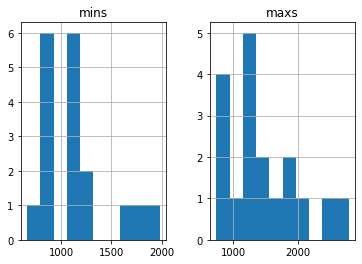

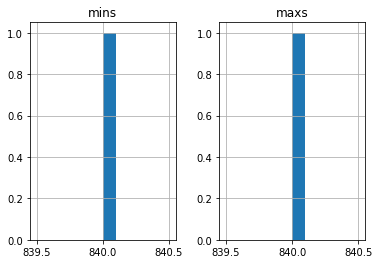

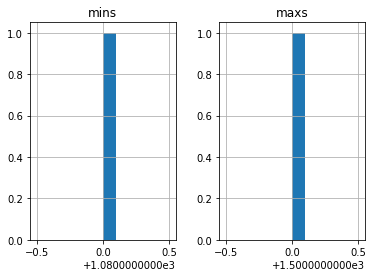

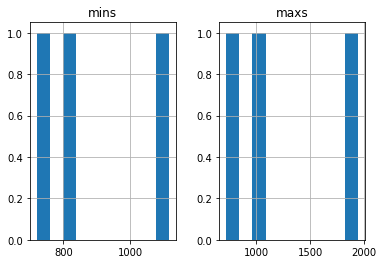

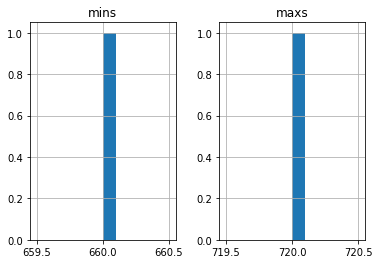

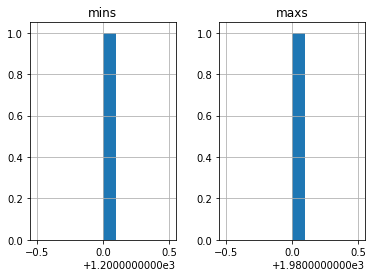

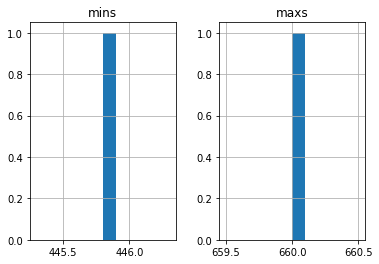

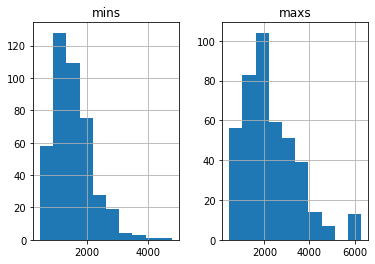

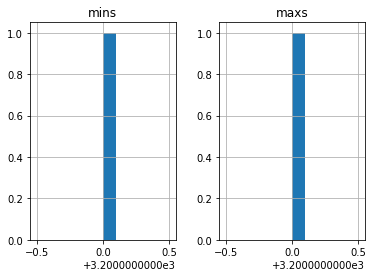

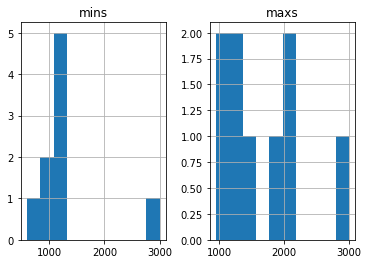

In [118]:
df.groupby('city').hist(column=['mins','maxs'])